In [62]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## Choice of Prediction Model

Since we are predicting a Boolean outcome (whether the passenger survived or not), we use appropriate classification models such as decision trees.

In [63]:
# machine learning  不需要的我给注释掉了，最后要用就用，不用就删了
from sklearn.linear_model import LogisticRegression  # 属于线性模型，用于分类（逻辑回归）
# from sklearn.svm import SVC, LinearSVC               # 支持向量机，不属于线性回归或决策树
from sklearn.ensemble import RandomForestClassifier  # 随机森林，不是单一决策树
# from sklearn.neighbors import KNeighborsClassifier   # K近邻，不相关
# from sklearn.naive_bayes import GaussianNB           # 朴素贝叶斯，不相关
# from sklearn.linear_model import Perceptron          # 感知机，不是标准线性回归
# from sklearn.linear_model import SGDClassifier       # 随机梯度下降分类器，可用于线性模型但不特指线性回归
from sklearn.tree import DecisionTreeClassifier       # 决策树分类器，相关

In [64]:
train_df = pd.read_csv('train.csv')#文件路径可能会有不一样，我在这里为了省事把csv文件和这个ipynb放一个文件夹了
test_df = pd.read_csv('test.csv')#路径等最后所有都确认了再改

combine = [train_df, test_df]

## Overview of the Data 

In this step, we observe the general patterns of each data category as well as the total amount of data contained in each category. It is noticeable that some categories have fewer data entries compared to others, indicating that there are missing values. We will handle these missing values with appropriate methods later.

In [65]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [68]:
combine.describe()

AttributeError: 'list' object has no attribute 'describe'

## Preliminary Data Analysis

We begin by exploring the relationship between each feature category and the survival rate. This initial analysis helps us identify which features may be important predictors of survival and guides the direction for further data processing and model selection.

In [69]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [70]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [71]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [72]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [73]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [74]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand')

C:\Users\yuhan\AppData\Local\Temp\ipykernel_20196\3627806787.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand')


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


## Fare Distribution and Binning

The distribution of the Fare feature is highly skewed. If we divide the data based on equal price intervals, some categories will have very few samples. Therefore, we choose to divide the Fare feature based on quantiles to ensure that each bin contains a similar number of samples.

In [75]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 5)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

C:\Users\yuhan\AppData\Local\Temp\ipykernel_20196\3925562446.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [76]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\yuhan\AppData\Local\Temp\ipykernel_20196\1184439594.py:3: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [77]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#用于探索“Title 与生存率”的关系；说明 Title 是一个有预测价值的特征（例如 Miss/Mrs 通常生存率更高）；可辅助做特征选择和分析。
#我们用的是 .mean()，是因为：Survived 是一个 0 或 1 的布尔变量，所以：mean() 就是 生还率, median() 只能告诉你多数人是死了还是活了（不够细致), 我们更想知道的是 “这个群体中多少人活了下来”，而不是仅仅“活得多还是死得多”。

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [78]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [79]:
title_ages = train_df.groupby('Title')['Age'].median()
for dataset in combine:
    dataset['Age'] = dataset.apply(
        lambda row: title_ages[row['Title']] if pd.isnull(row['Age']) else row['Age'],
        axis=1
    )
    dataset['Age'] = dataset['Age'].astype(int)
#name中有用处的只有title，把title转换成年龄，从而不需要name这一项了

In [80]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [81]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
#用数字0，1替换sex

In [82]:
for dataset in combine:
    dataset.drop(['Title'], axis=1, inplace=True)

In [83]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]","(-0.001, 7.854]"
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]","(39.688, 512.329]"
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]","(7.854, 10.5]"
3,1,1,1,2,1,0,113803,53.1000,C123,S,"(32.252, 48.168]","(39.688, 512.329]"
4,0,3,0,2,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]","(7.854, 10.5]"


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.从 train_df 数据集中拿出 Embarked（登船港口）这一列，先去掉空值 (dropna())，然后找出出现频率最高的值（即众数）用 .mode()[0]。

 对数据集中所有的 dataset（通常是 train_df 和 test_df，组合成 combine = [train_df, test_df]）： 将 Embarked 中的缺失值用第一步找到的众数 freq_port 来填补。看看“从哪个港口登船的乘客生存率较高”

In [84]:
# 1. 合并所有 Embarked 数据，找到众数
all_embarked = pd.concat([df['Embarked'] for df in combine], ignore_index=True)
most_common_embarked = all_embarked.dropna().mode()[0]  # 找出众数

# 2. 用这个众数填补各个 dataset 的缺失值
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_common_embarked)
print(f"Embarked 众数是: {most_common_embarked}")

Embarked 众数是: S


In [85]:
# 从 Cabin 提取 Deck (首字母)
for dataset in combine:
    dataset['Deck'] = dataset['Cabin'].str[0]
    
    # 用空字符串填充缺失值
    dataset['Deck'] = dataset['Deck'].fillna('U')
    
    # 将 Deck 映射为数值
    deck_mapping = {'': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
    dataset['Deck'] = dataset['Deck'].map(deck_mapping)

### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [86]:
# 编码 Sex 特征
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0})

In [87]:
# 编码 Embarked 特征
for dataset in combine:
    # 使用最常见的值填充缺失值
    # 先检查是否有模式值，防止 KeyError
    if dataset['Embarked'].mode().empty:
        dataset['Embarked'] = dataset['Embarked'].fillna('S')
    else:
        dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [88]:
# 编码 Deck 特征
deck_mapping = {'': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
for dataset in combine:
    dataset['Deck'] = dataset['Deck'].map(deck_mapping)

我们决定不用ticket的原因

In [89]:
# 合并所有 Ticket 统计出现次数
all_tickets = pd.concat([df[['Ticket']] for df in combine])
ticket_counts = all_tickets['Ticket'].value_counts()

# 分别加到 train_df 和 test_df 中
for dataset in combine:
    dataset['Ticket_Count'] = dataset['Ticket'].map(ticket_counts)
print(train_df[['Ticket_Count', 'Survived']].groupby('Ticket_Count').mean().sort_index())

KeyError: "['Ticket_Count'] not in index"

Ticket 重复人数（Ticket_Count）和生还率（Survived）之间没有简单线性关系，而是有点“先升后降”再波动的趋势。

In [90]:
for dataset in combine:
    dataset['Ticket_Count'] = dataset.groupby('Ticket')['Ticket'].transform('count')

In [91]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']

In [92]:
for dataset in combine:
    print(dataset[['Ticket_Count', 'Family']].groupby('Ticket_Count').mean())

                Family
Ticket_Count          
1             0.217550
2             1.191489
3             1.365079
4             3.000000
5             3.100000
6             5.666667
7             5.333333
                Family
Ticket_Count          
1             0.451713
2             1.666667
3             2.222222
4             5.500000
5             2.400000


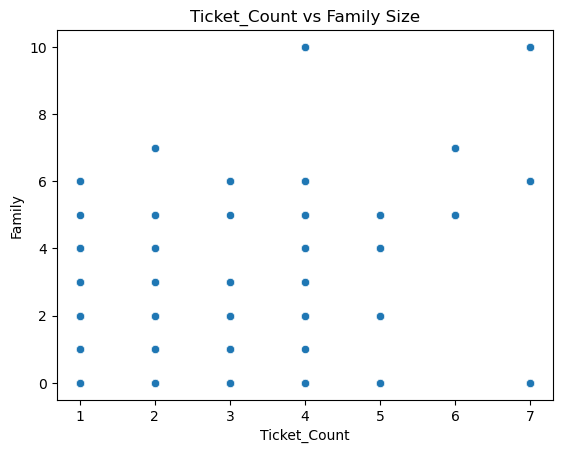

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
# 绘制 Ticket_Count vs Family 散点图
sns.scatterplot(data=pd.concat(combine), x='Ticket_Count', y='Family')
plt.title('Ticket_Count vs Family Size')
plt.show()

说明没有明显的联系

### Quick completing and converting a numeric feature

complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. 

round off the fare to two decimals
Fare 是一个连续型数值特征，表示乘客支付的票价。对于连续型数值特征，我们通常会将其进行以下处理:

对 Fare 的处理：
缺失值填充： Fare 是一个数值特征，它的缺失值可以用均值、众数或中位数来填充.

单独处理test的缺失值,防止数据泄露使模型异常精确.需要注意的是，我们不会创建任何新的中间特征，也不会进行额外的相关性分析来猜测缺失的特征值，因为我们只是简单地填补一个缺失值。此填补操作的目标是确保模型算法在操作时使用的 Fare 特征是非空的，避免模型在处理时遇到缺失值

In [94]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

C:\Users\yuhan\AppData\Local\Temp\ipykernel_20196\31889810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Ticket_Count,Family
0,892,3,"Kelly, Mr. James",NaN,2,0,0,330911,7.8292,NaN,Q,NaN,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",NaN,2,1,0,363272,7.0000,NaN,S,NaN,1,1
2,894,2,"Myles, Mr. Thomas Francis",NaN,3,0,0,240276,9.6875,NaN,Q,NaN,1,0
3,895,3,"Wirz, Mr. Albert",NaN,1,0,0,315154,8.6625,NaN,S,NaN,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",NaN,1,1,1,3101298,12.2875,NaN,S,NaN,1,2


等频分箱

In [95]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

C:\Users\yuhan\AppData\Local\Temp\ipykernel_20196\2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


手动分箱.将 Fare 特征转换为有序（ordinal）的数值。可以根据 Fare 的分箱（如将票价划分为不同区间）将 Fare 转换为有序数值，这样可以适应模型的需求。

In [96]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]"
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]"
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]"
3,1,1,1,2,1,0,113803,53.1000,C123,S,"(32.252, 48.168]"
4,0,3,0,2,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]"
5,0,3,0,1,0,0,330877,8.4583,NaN,Q,NaN
6,0,1,0,3,0,0,17463,51.8625,E46,S,"(48.168, 64.084]"
7,0,3,0,0,3,1,349909,21.0750,NaN,S,"(0.34, 16.336]"
8,1,3,1,1,0,2,347742,11.1333,NaN,S,"(16.336, 32.252]"
9,1,2,1,0,1,0,237736,30.0708,NaN,C,"(0.34, 16.336]"


In [97]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Ticket_Count,Family
0,892,3,"Kelly, Mr. James",NaN,2,0,0,330911,0,NaN,Q,NaN,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",NaN,2,1,0,363272,0,NaN,S,NaN,1,1
2,894,2,"Myles, Mr. Thomas Francis",NaN,3,0,0,240276,1,NaN,Q,NaN,1,0
3,895,3,"Wirz, Mr. Albert",NaN,1,0,0,315154,1,NaN,S,NaN,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",NaN,1,1,1,3101298,1,NaN,S,NaN,1,2
5,897,3,"Svensson, Mr. Johan Cervin",NaN,0,0,0,7538,1,NaN,S,NaN,1,0
6,898,3,"Connolly, Miss. Kate",NaN,1,0,0,330972,0,NaN,Q,NaN,1,0
7,899,2,"Caldwell, Mr. Albert Francis",NaN,1,1,1,248738,2,NaN,S,NaN,1,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",NaN,1,0,0,2657,0,NaN,C,NaN,1,0
9,901,3,"Davies, Mr. John Samuel",NaN,1,2,0,A/4 48871,2,NaN,S,NaN,1,2
